In [1]:
import numpy as np
from PIL import Image
import random

import torch
from torchvision import transforms as T
from torchvision.transforms import functional as F
import torchvision.transforms as transforms
from torchvision.datasets import Cityscapes

import augmentations as A

In [2]:
# Define a list of transformations
augment_tranmforms = [A.Resize((256, 256)), # This resize is to get a reference when cropping
                    A.RandomHorizontalFlip(),
                    A.RandomCropWithProbability(220, 0.9),
                    A.RandomRotation(degrees=(-35, 35)),
                    A.Resize((256, 256)), # this resize is to make sure that all the output images have intened size
                    A.ToTensor()]

# Instanciate the Compose class with the list of transformations
data_transforms = A.Compose(augment_tranmforms)

dataset_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\archive'

# Augmenting the images and mask at the same time
# Create transformed and AUGMENTED train dataset
augment_train_dataset = Cityscapes(dataset_path, split='train', mode='fine',
                            target_type='semantic', transforms=data_transforms)

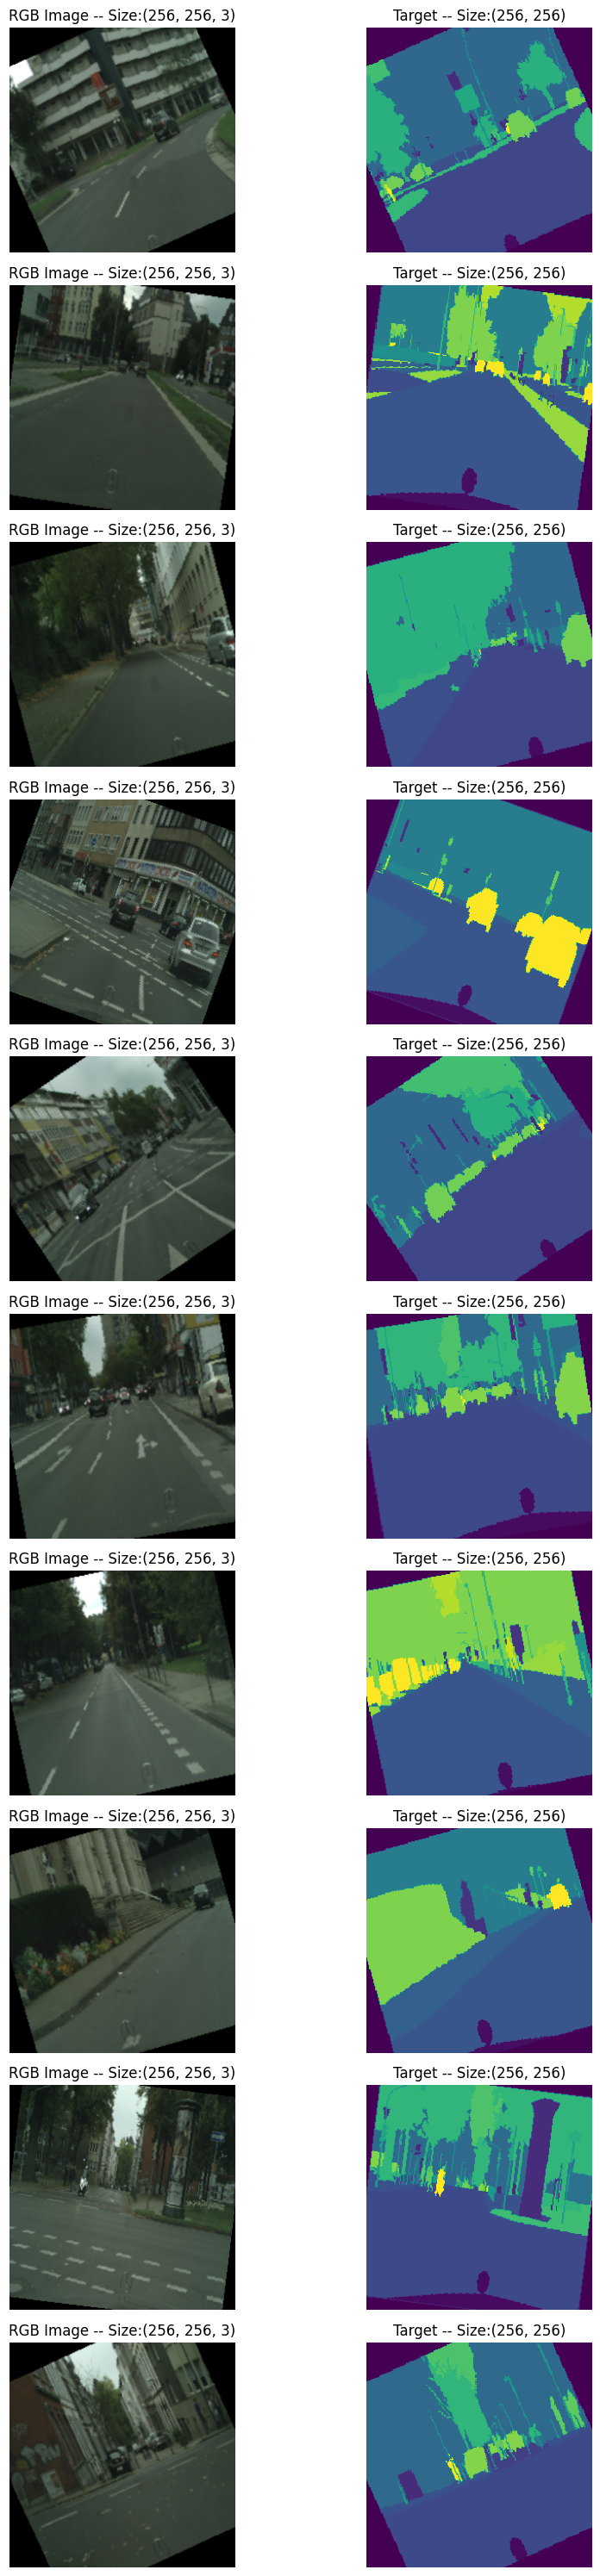

In [3]:
import matplotlib.pyplot as plt

N = 10 # munber of sampels to visualize
# Get the first three samples from the training dataset
samples = [augment_train_dataset[i] for i in range(N)]

# Create a 3x2 subplot grid
fig, axs = plt.subplots(N, 2, figsize=(10, 3*N))

for i, (img, mask) in enumerate(samples):
    # The images and masks are PyTorch tensors, so we need to convert them to numpy arrays for visualization
    img = img.permute(1, 2, 0).numpy()
    mask = mask.squeeze().numpy()

    # Plot the image in the first column
    axs[i, 0].imshow(img)
    axs[i, 0].axis('off')
    axs[i, 0].set_title('RGB Image -- Size:' + str(img.shape))

    # Plot the mask in the second column
    axs[i, 1].imshow(mask)
    axs[i, 1].axis('off')
    axs[i, 1].set_title('Target -- Size:' + str(mask.shape))

plt.tight_layout()
plt.show()

In [4]:
# Define the transformations
data_transforms = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Resize((256,256))
])

# Define a list of transformations
aug_tranmforms = [A.Resize((256, 256)), # This resize is to get a reference when cropping
                    A.RandomHorizontalFlip(),
                    A.RandomCropWithProbability(220, 0.9),
                    A.RandomRotation(degrees=(-35, 35)),
                    A.Resize((256, 256)), # this resize is to make sure that all the output images have intened size
                    A.ToTensor()]

# Instanciate the Compose class with the list of transformations
augment_transforms = A.Compose(aug_tranmforms)

# Create transformed train dataset
training_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)
# training_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transforms=data_transforms)

print(f"Number of samples in the training dataset: {len(training_dataset)}")

# Create augmented train dataset
# augmented_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=augment_tranmforms, target_transform=augment_transforms)
augmented_dataset = Cityscapes(dataset_path, split='train', mode='fine',
                            target_type='semantic', transforms=augment_transforms)

print(f"Number of samples in the augmented dataset: {len(augmented_dataset)}")


Number of samples in the training dataset: 2975
Number of samples in the augmented dataset: 2975


In [5]:
# Get the first item from the dataset
item = training_dataset[0]

# Print the type of the item
print(f'Type: {type(item)}')

img, mask = item

# If the item is a tuple, print the type and size of its elements
if isinstance(item, tuple):
    print(f'First element type (image): {type(img)}, size: {img.shape}')
    print(f'Second element type (mask): {type(mask)}, size: {mask.shape}')

Type: <class 'tuple'>
First element type (image): <class 'torch.Tensor'>, size: torch.Size([3, 256, 256])
Second element type (mask): <class 'torch.Tensor'>, size: torch.Size([1, 256, 256])


c:\Users\jakub\anaconda3\envs\experiments\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [6]:
augment_item= augmented_dataset[0]

# Print the type of the item
print(f'Type: {type(augment_item)}')

augment_img, augment_mask = augment_item

# If the item is a tuple, print the type and size of its elements
if isinstance(augment_item, tuple):
    print(f'First element type (image): {type(augment_img)}, size: {augment_img.shape}')
    print(f'Second element type (mask): {type(augment_mask)}, size: {augment_mask.shape}')
    

Type: <class 'tuple'>
First element type (image): <class 'torch.Tensor'>, size: torch.Size([3, 256, 256])
Second element type (mask): <class 'torch.Tensor'>, size: torch.Size([1, 256, 256])


In [7]:
from torch.utils.data import ConcatDataset, DataLoader, random_split

# Combine the datasets
combined_dataset = ConcatDataset([training_dataset, augmented_dataset])

print(f"Number of samples in the combined dataset: {len(combined_dataset)}")

# Determine the lengths of the training and validation sets
total_size = len(combined_dataset)
train_size = int(0.8 * total_size)  # 80% for training
val_size = total_size - train_size  # 20% for validation

# Shuffle and Split the combined dataset 
train_dataset, val_dataset = random_split(combined_dataset, [train_size, val_size])

# Create the dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True, 
                                pin_memory=True if torch.cuda.is_available() else False)
val_dataloader = DataLoader(val_dataset, batch_size=10, shuffle=False, 
                                pin_memory=True if torch.cuda.is_available() else False)

Number of samples in the combined dataset: 5950


In [8]:
# cheching the content of the dataloader
# For the train dataloader
for i, (inputs, targets) in enumerate(train_dataloader):
    print(f"In batch {i}, the type of inputs is {type(inputs)} and the type of targets is {type(targets)}")
    break  # We break after the first batch as we just want to know the type

# For the validation dataloader
for i, (inputs, targets) in enumerate(val_dataloader):
    print(f"In batch {i}, the type of inputs is {type(inputs)} and the type of targets is {type(targets)}")
    break  # We break after the first batch as we just want to know the type

In batch 0, the type of inputs is <class 'torch.Tensor'> and the type of targets is <class 'torch.Tensor'>
In batch 0, the type of inputs is <class 'torch.Tensor'> and the type of targets is <class 'torch.Tensor'>


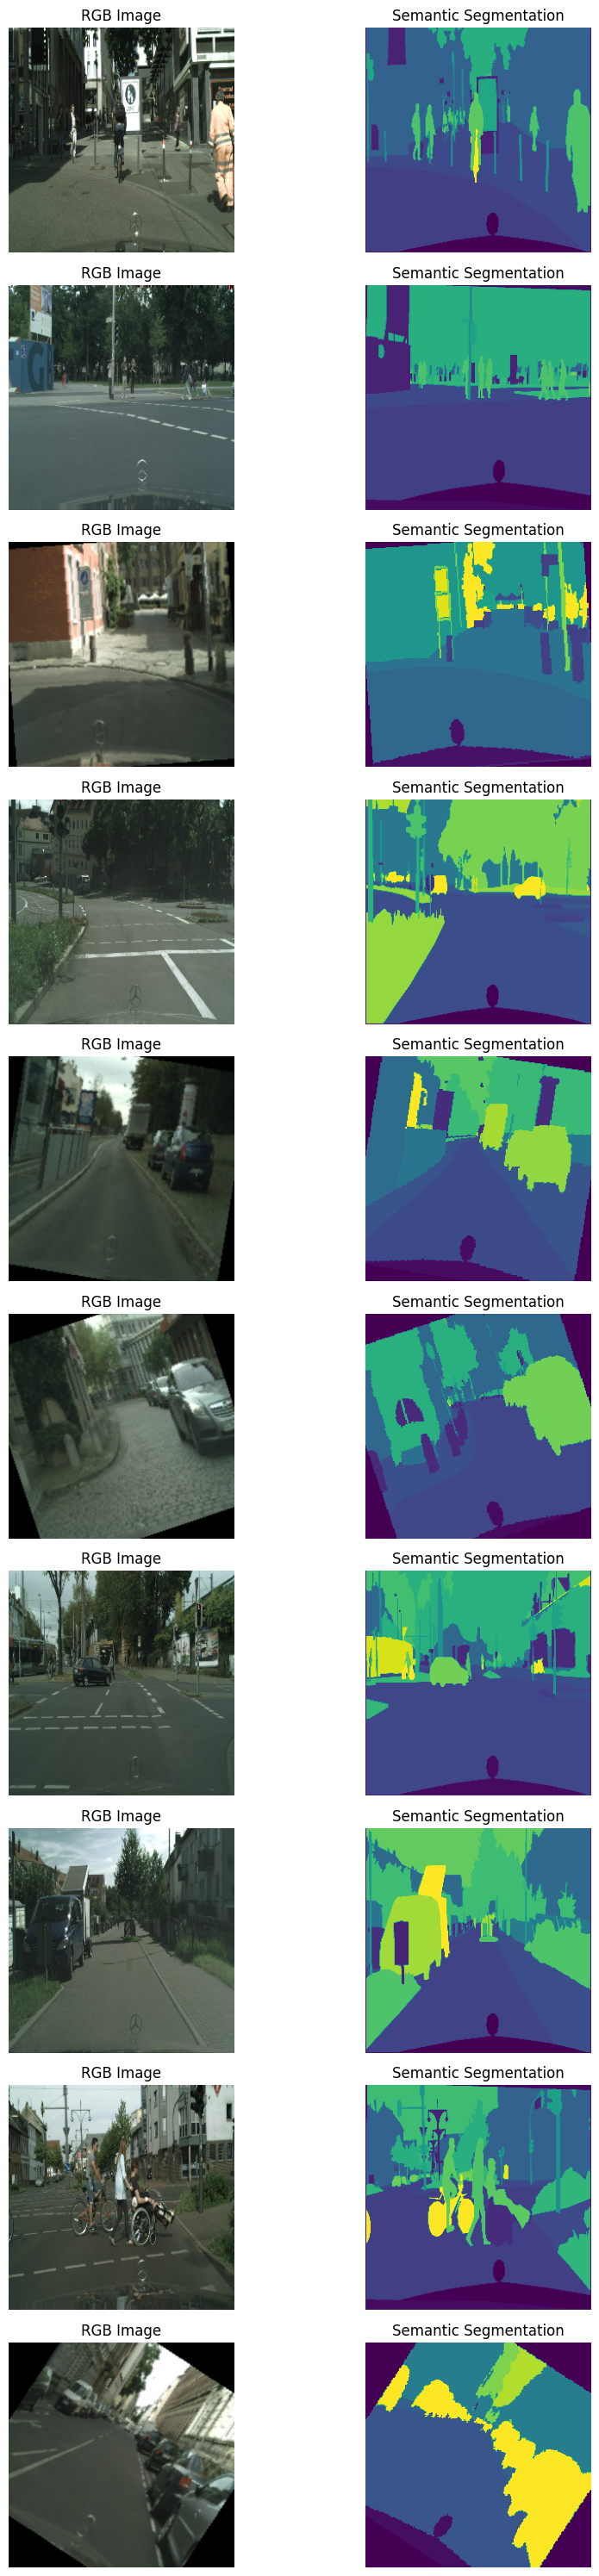

In [9]:
import matplotlib.pyplot as plt

N = 10 # number of sampels

# Get the first three samples from the training dataset
samples = [train_dataset[i] for i in range(N)]

# Create a 3x2 subplot grid
fig, axs = plt.subplots(N, 2, figsize=(10, 3*N))

for i, (img, mask) in enumerate(samples):
    # The images and masks are PyTorch tensors, so we need to convert them to numpy arrays for visualization
    img = img.permute(1, 2, 0).numpy()
    mask = mask.squeeze().numpy()

    # Plot the image in the first column
    axs[i, 0].imshow(img)
    axs[i, 0].axis('off')
    axs[i, 0].set_title('RGB Image')

    # Plot the mask in the second column
    axs[i, 1].imshow(mask)
    axs[i, 1].axis('off')
    axs[i, 1].set_title('Semantic Segmentation')

plt.tight_layout()
plt.show()

In [10]:
# Testing the training lood with the validation loader and the augmented dataset
from model import Model
import model_executables as mex

import torch.nn as nn
import torch.optim as optim


# Instanciate the model
UNet_model = Model()

# Move the model to the GPU if avaliable
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNet_model = UNet_model.to(device)

criterion = nn.CrossEntropyLoss(ignore_index=255)
optimizer = optim.Adam(UNet_model.parameters(), lr=0.01)

# Train the instanciated model
mex.train_model(UNet_model, train_dataloader, val_dataloader, num_epochs=2, patience=3, criterion=criterion, optimizer=optimizer)


2.1.2
